In [4]:
from IPython.display import display, Latex, Math, Markdown
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
from __future__ import division #needed to use fractions without specifying floats
import fractions #to use gcd in cook's code

sym.init_printing()
def printltx(s):
   try: 
       display(Latex(s))
   except: 
       print(s)
def ltxmtx(A, axis = 1):
       try: 
           if isinstance(A, np.ndarray):
               A = A.round(4)
           M = sym.Matrix(A)
           sh = np.array(M.shape)
           sz = np.prod(sh)
           if sz == np.max(sh):
               if axis == 0:
                   M=M.reshape(sz,1)
               else:
                   M=M.reshape(1,sz)
           return " $"+ sym.latex(M) + "$ "
       except: 
           return A
       
array_f = get_ipython().display_formatter.formatters['text/latex']
array_f.for_type('numpy.ndarray',ltxmtx)
array_f.for_type('sympy.matrices.dense.MutableDenseMatrix', ltxmtx)

In [5]:
def compute_absorbed(v, States_in_Recurence=[]):
   if States_in_Recurrence == []:
       ap = [1,0]
   else:
       ap = [np.sum(v[states] for states in States_in_Recurrence)]
   return np.array(ap)


def plot_absorption(absorbed_proportions, Tolerance):
   absorbed_proportions = np.array(absorbed_proportions)
   absorbed_cumulative = np.sum(absorbed_proportions,axis=1) #total absorbed by all recurrence classes
   absorbed_cumulative = absorbed_cumulative[absorbed_cumulative<1-Tolerance] #Remove tail, if simulation continued to run after complete absorption
   absorbed_cumulative = np.append(absorbed_cumulative,1.0) #append 1.0 to end
   absorbed_marginal = np.diff(absorbed_cumulative) #find "newly" absorbed proportion at each step
   absorbed_marginal = np.insert(absorbed_marginal,0,absorbed_cumulative[0]) #np.diff shrinks array by 1 entry.  Prepend 0.0
   times = np.arange(absorbed_marginal.shape[0])
   printltx(r"Absorbed proportions (by recurrence class) "+ltxmtx(absorbed_proportions[-1]))
   plt.bar(times,absorbed_marginal)
   plt.show()
   ave = absorbed_marginal.dot(times)
   printltx(r"Mean absorption time is "+str(ave))
   return

In [15]:
def simulate_samples(P,phi,Steps,Records,Samples, States_in_Recurrence, Tolerance):
   States = P.shape[0]
   #print("\n")
   printltx(r"Begin Simulate Samples")
   printltx(r"Simulating "+str(Steps)+" steps with "+str(Samples)+" samples.")
   epdf = np.zeros([Records, States], dtype = float)
   epdf[0,:] = phi[:]
   
   ap = compute_absorbed(phi, States_in_Recurrence)
   absorbed_proportions = [ap]
   
   y = np.rint(phi*Samples).astype(int)
   Samples = np.sum(y)
   X = np.zeros([Records,Samples], dtype = int)
   X[0,:] = np.random.choice(States, Samples, p=phi)
   
   startStep = 0
   
   while (startStep < Steps | (np.sum(ap) < 1-Tolerance)):
       current_step = startStep%Records 
       next_step = (startStep+1)%Records
       for samp in range(Samples):
           current_state = X[current_step,samp]
           r = np.random.rand()
           for next_state in range(States):
               r -= P[current_state, next_state]
               if r < 0:
                   X[next_step, samp] = next_state
                   break 
           v = np.histogram(X[next_step, :], normed=True, bins=range(States+1))[0]
           epdf[next_step,:] = v
       ap = compute_absorbed(v, States_in_Recurrence)
       absorbed_proportions.append(ap)
       startStep+=1
   epdf = np.roll(epdf,Records-next_step-1,axis=0)
   printltx(r"I did "+str(Steps)+" steps with "+str(Samples)+" samples. The last "+str(Records)+" distributions are written as rows below.")
   display(epdf)
   printltx(r"The average of these distributions is "+ltxmtx(np.mean(epdf,0)))
   avg = np.mean(epdf,0)
   printltx(r"The probability that Nez gets eaten is "+str(avg[6]))
   printltx(r"The probability that Nez gets home safely is "+str(avg[8]))
   plot_absorption(absorbed_proportions, Tolerance=Tolerance)
   return 

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

array([[ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.632,  0.   ,
         0.368],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.632,  0.   ,
         0.368],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.632,  0.   ,
         0.368],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.632,  0.   ,
         0.368],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.632,  0.   ,
         0.368],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.632,  0.   ,
         0.368],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.632,  0.   ,
         0.368],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.632,  0.   ,
         0.368],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.632,  0.   ,
         0.368],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.632,  0.   ,
         0.368]])

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

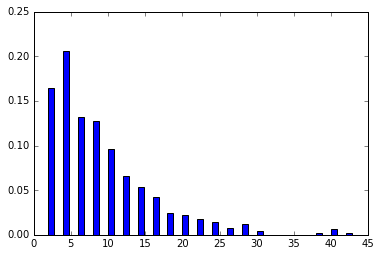

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

array([[ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.476,  0.   ,
         0.524],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.476,  0.   ,
         0.524],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.476,  0.   ,
         0.524],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.476,  0.   ,
         0.524],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.476,  0.   ,
         0.524],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.476,  0.   ,
         0.524],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.476,  0.   ,
         0.524],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.476,  0.   ,
         0.524],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.476,  0.   ,
         0.524],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.476,  0.   ,
         0.524]])

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

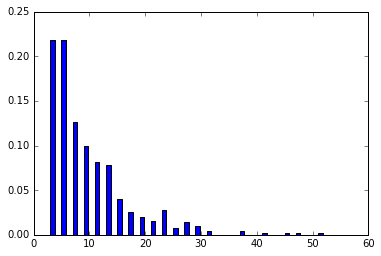

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

array([[ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.286,  0.   ,
         0.714],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.286,  0.   ,
         0.714],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.286,  0.   ,
         0.714],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.286,  0.   ,
         0.714],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.286,  0.   ,
         0.714],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.286,  0.   ,
         0.714],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.286,  0.   ,
         0.714],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.286,  0.   ,
         0.714],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.286,  0.   ,
         0.714],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.286,  0.   ,
         0.714]])

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

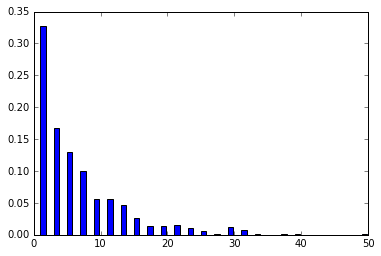

<IPython.core.display.Latex object>

In [16]:
States = 9
phi_zero = np.array([1,0,0,0,0,0,0,0,0])
phi_one = np.array([0,1,0,0,0,0,0,0,0])
phi_five = np.array([0,0,0,0,0,1,0,0,0])

P = np.array([[0,.5,0,.5,0,0,0,0,0],[1/3,0,1/3,0,1/3,0,0,0,0],[0,.5,0,0,0,.5,0,0,0],
             [1/3,0,0,0,1/3,0,1/3,0,0],[0,.25,0,.25,0,.25,0,.25,0],[0,0,1/3,0,1/3,0,0,0,1/3],
             [0,0,0,0,0,0,1,0,0],[0,0,0,0,1/3,0,1/3,0,1/3],[0,0,0,0,0,0,0,0,1]])
printltx(r"$P = $"+ltxmtx(P))

#P = normalize_rows(P)
#P,phi,Steps,Records,Samples, States_in_Recurrence, Tolerance

Steps = 500
Records = 10 #to manage memory, just keep the 10 most recent "records"
Samples = 500
tol = 0.0001
States_in_Recurrence = [[6],[8]]


printltx(r"Ned begins in Room 0:")
simulate_samples(P, phi_zero, Steps, Records, Samples, States_in_Recurrence, tol)
print("\n")
printltx(r"Ned begins in Room 1:")
simulate_samples(P, phi_one, Steps, Records, Samples, States_in_Recurrence, tol)
print("\n")
printltx(r"Ned begins in Room 5:")
simulate_samples(P, phi_five, Steps, Records, Samples, States_in_Recurrence, tol)